In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib import pyplot as plt
import dataframe_image as dfi

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurment=base.classes.measurement
station=base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [9]:
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [10]:
# Perform a query to retrieve the data and precipitation scores
pre_data=session.query(measurment.date,measurment.prcp).filter(measurment.date >="2016-08-24").\
            filter(measurment.date<="2017-08-23").all()

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Save the query results as a Pandas DataFrame and set the index to the date column
pre_df=pd.DataFrame(pre_data).set_index('date')
pre_df=pre_df.rename(columns={'prcp':'precipitation'})
# Sort the dataframe by date
pre_df=pre_df.sort_values(by='date').dropna()
pre_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


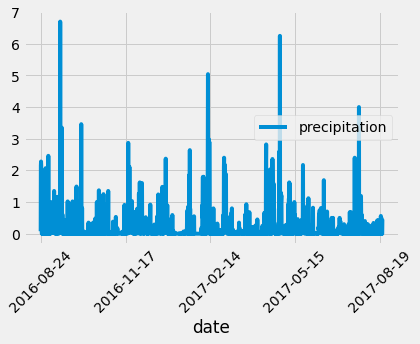

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
pre_df.plot(rot=45)
plt.savefig("Precipitation_Analysis.png")
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
describe=pre_df.describe()
dfi.export(describe, 'describe.png')
describe.head()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000


In [14]:
# Design a query to show how many stations are available in this dataset?
station=session.query(station.id).count()
print(f'There are {station} stations available in this dataset.')

There are 9 stations available in this dataset.


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity=session.query(measurment.station,func.count(measurment.station)).group_by(measurment.station).order_by(func.count(measurment.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
summary='USC00519281'
session.query(func.min(measurment.tobs),
              func.max(measurment.tobs),
              func.avg(measurment.tobs)).filter(measurment.station == summary).all()

[(54.0, 85.0, 71.66378066378067)]

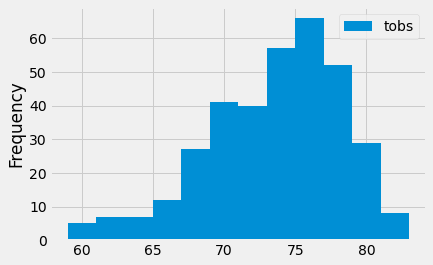

In [17]:
# Choose the station with the highest number of temperature observations.
highest=activity[0][0]
#Query the last 12 months of temperature observation data for this station
results=session.query(measurment.date,measurment.tobs).\
        filter(measurment.date >= '2016-08-24').\
        filter(measurment.date <= '2017-08-23').\
        filter(measurment.station == highest).all()
               

#Plot the results as a histogram
results_df = pd.DataFrame(results)
results_df.plot.hist(bins=12)
plt.savefig("Station-Histogram.png")